In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def lib(FileName):
    def openFile(FileName):
        read_data = open(f'{FileName}')
        data = read_data.read()
        data = data.splitlines()
        read_data.close()
        
        return data
        
    lib = {}
    
    for lines in openFile(FileName):
        if lines != 'CloneID Familienummer':
            line = lines.split()
            if len(line[1:]) == 1:
                lib[int(line[0])] = int(line[1])
            else:
                lib[int(line[0])] = line[1:]
            
    return lib
            
lib_family = lib('..\Data\CloneIdFamily.txt')
lib_expr = lib('..\Data\Ruwe Data Fase 3.txt')


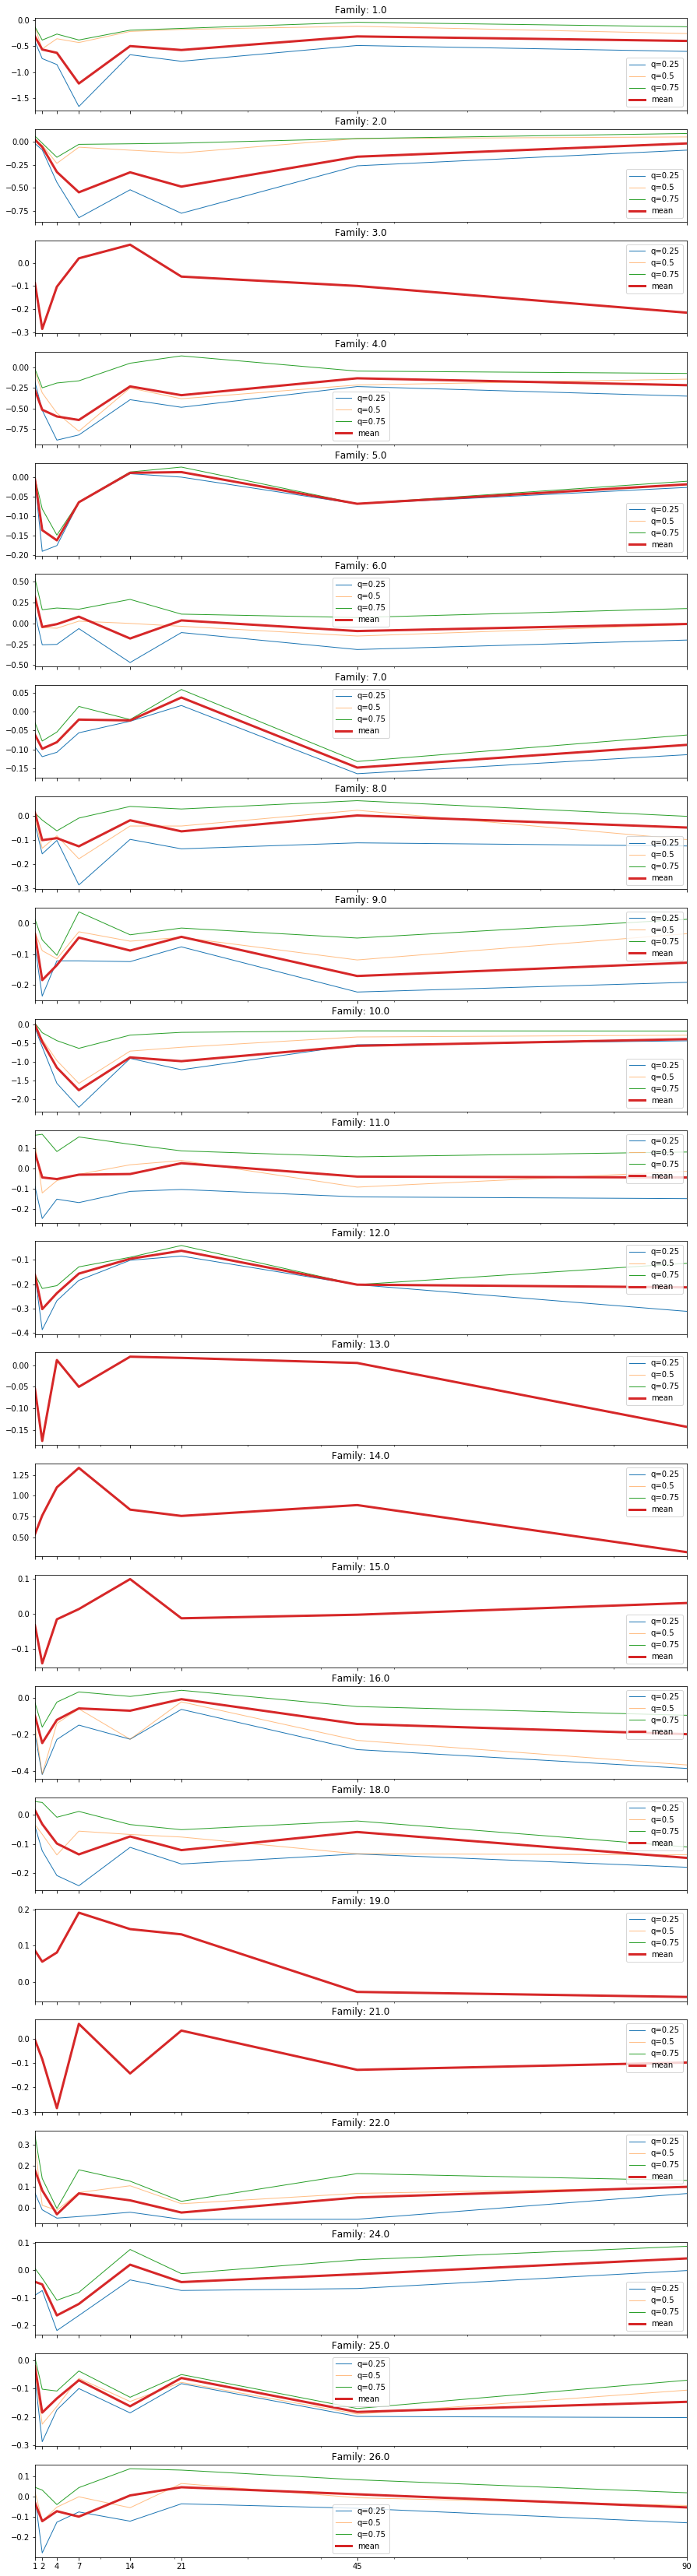

In [43]:
def plot_familys(data_fam, data_expr):  
    
    ID_expr_fam = {}

    for ID in data_fam:
        expression = data_expr[ID]
        expression.append(int(data_fam[ID]))
        ID_expr_fam[ID] = expression

    df_family = pd.DataFrame.from_dict(ID_expr_fam, orient='index')      
    df_data = pd.DataFrame(ID_expr_fam)
    days = [1,2,4,7,14,21,45,90, 'family'] # --> moet geimporteerd worden
    new_cols = {i:days[i] for i in df_data.index}
    days.pop()
    df_data = df_data.transpose().rename(columns=new_cols).astype(float)
    nr_familys = int(df_data['family'].max())
    
    df_grouped = df_data.groupby('family')
    lower_bound = df_grouped.quantile(q=0.25) # maak eventueel variabel als dit nodig is
    higher_bound = df_grouped.quantile(q=0.75) # maak eventueel variabel als dit nodig is
    middle_bound = df_grouped.quantile(q=0.5) # maak eventueel variabel als dit nodig is
    mean = df_grouped.mean()
    std = df_grouped.std()
    fig, ax=plt.subplots(ncols=1,nrows=len(list(mean.index)),figsize=(15,60),sharex=True)
    plot_nr = 0
    
    #print(df_grouped.loc[3].describe())
    
    for family in mean.index:
        try: 
            st = std.loc[family]
            lower_bound.loc[family].plot(ax=ax[plot_nr], alpha=1, linewidth=1)
            middle_bound.loc[family].plot(ax=ax[plot_nr], alpha=0.5, linewidth=1)
            higher_bound.loc[family].plot(ax=ax[plot_nr], alpha=1, linewidth=1)
            mean.loc[family].plot(ax=ax[plot_nr], alpha=1, linewidth=3)
            ax[plot_nr].legend(['q=0.25','q=0.5','q=0.75','mean'])
            if family == 0:
                family = mean.index[-1] + 1
            ax[plot_nr].set_title(f'Family: {family}')
            ax[plot_nr].set_xticks(days)
            ax[plot_nr].set_xlim(days[0],days[-1])
            #plot_nr += 1
        except:
      
            #lower_bound.loc[family].plot(ax=ax[plot_nr], alpha=1, linewidth=1)
            #middle_bound.loc[family].plot(ax=ax[plot_nr], alpha=0.5, linewidth=1)
            #higher_bound.loc[family].plot(ax=ax[plot_nr], alpha=1, linewidth=1)
            mean.loc[family].plot(ax=ax[plot_nr], alpha=1, linewidth=3)
            ax[plot_nr].legend(['mean'])
            if family == 0:
                family = mean.index[-1] + 1
            ax[plot_nr].set_title(f'Family: {family}')
            ax[plot_nr].set_xticks(days)
            ax[plot_nr].set_xlim(days[0],days[-1])
        plot_nr += 1
    
    empty_familys = np.setdiff1d(list(range(1,nr_familys+1)), list(mean.index))

  #'q=0.25','q=0.5','q=0.75',  
plot_familys(lib_family, lib_expr)